In [2]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
from myfuncts2  import *
import myfuncts
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


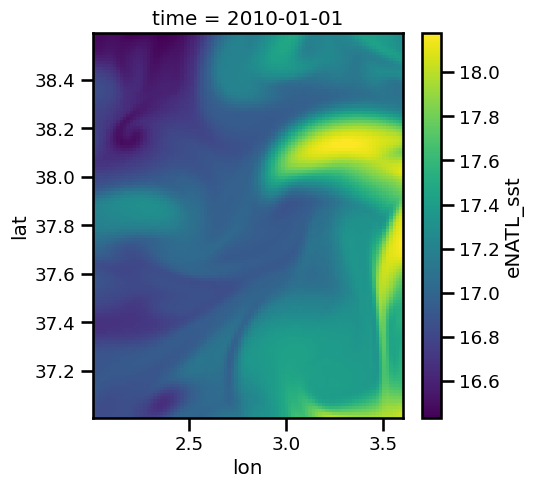

In [3]:
from mpsd import *
from myfuncts2  import *

model = xr.open_mfdataset('data/daily/enatll.nc')


sst="eNATL_sst"

plt.rcParams["figure.figsize"] = [5, 5]
f, ax = plt.subplots(1, 1, sharey=True)

i=73 #L4>>model
i=0 #L4<model 
i=10 #L4<<model
i=20 #L4>>>model
i=40 #L4< model large scale > smale scale
i=60 #L4>model
i=80 #same
i=100  #L4< model large scale > smale scale
i=120 # same highscale L4>,odel smal
i=150 #l4>>>>model
i=200 #same
i=230
i=0
#L4[sst]=L4[sst]#-273.15
model = model.sel(time=slice(model['time'][i],model['time'][i+2]))
model[sst][0,:,:].plot(ax=ax,x='lon', y='lat')

plt.show()
#model

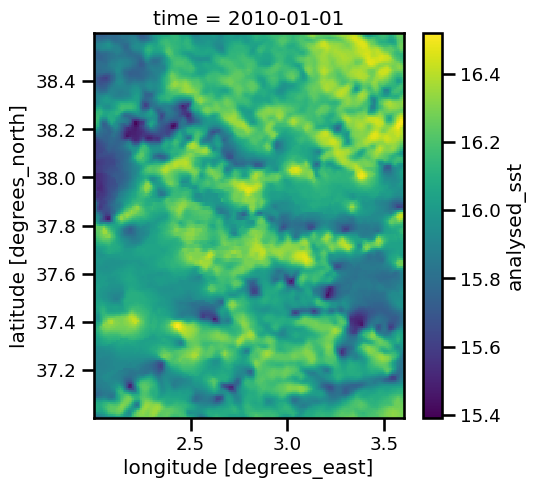

In [4]:
from mpsd import *
from myfuncts2  import *

L4 = xr.open_mfdataset('data/daily/sst.nc')


sst="analysed_sst"

plt.rcParams["figure.figsize"] = [5, 5]
f, ax = plt.subplots(1, 1, sharey=True)

L4 = L4.sel(time=slice(L4['time'][i],L4['time'][i+2]))
L4[sst][0,:,:].plot(ax=ax,x='lon', y='lat')

plt.show()
#ncdata

In [5]:
#alldata=['sst', 'sst_gcm_5', 'sst_gcm_10', 'sst_gcm_15', 'sst_gcm_20', 'sst_gcm_25', 'sst_gcm_30', 'sst_gcm_40', 'sst_gcm_45', 'sst_gcm_50']
alldata=sorted(list(L4.keys()))
for i in alldata:
    #i='eNATL_'+i
    print(i)
    signal= L4[i].chunk({"lat":1, 'time': L4['time'].size, 'lon': L4['lon'].size})
    signal['time'] = (signal.time - signal.time[0]) / numpy.timedelta64(1, 'D')
    psd_signal = xrft.power_spectrum(signal, dim=['time','lon'], detrend='constant', window=True).compute()
    mean_psd_signal = psd_signal.mean(dim=['lat']).where( (psd_signal.freq_time > 0) &(psd_signal.freq_lon > 0), drop=True)

    mean_psd_signal_lon = mean_psd_signal.mean("freq_time")
    mean_psd_signal_lon=mean_psd_signal_lon.rename({'freq_lon': 'freq_lon_'+i})
    L4=L4.assign(psd=mean_psd_signal_lon)
    L4=L4.rename({'psd': 'psd_'+i})

#mean_psd_signal_time = mean_psd_signal.mean("freq_lon")


analysed_sst
analysis_error


# PSD over one day

psd_analysed_sst
psd_eNATL_sst


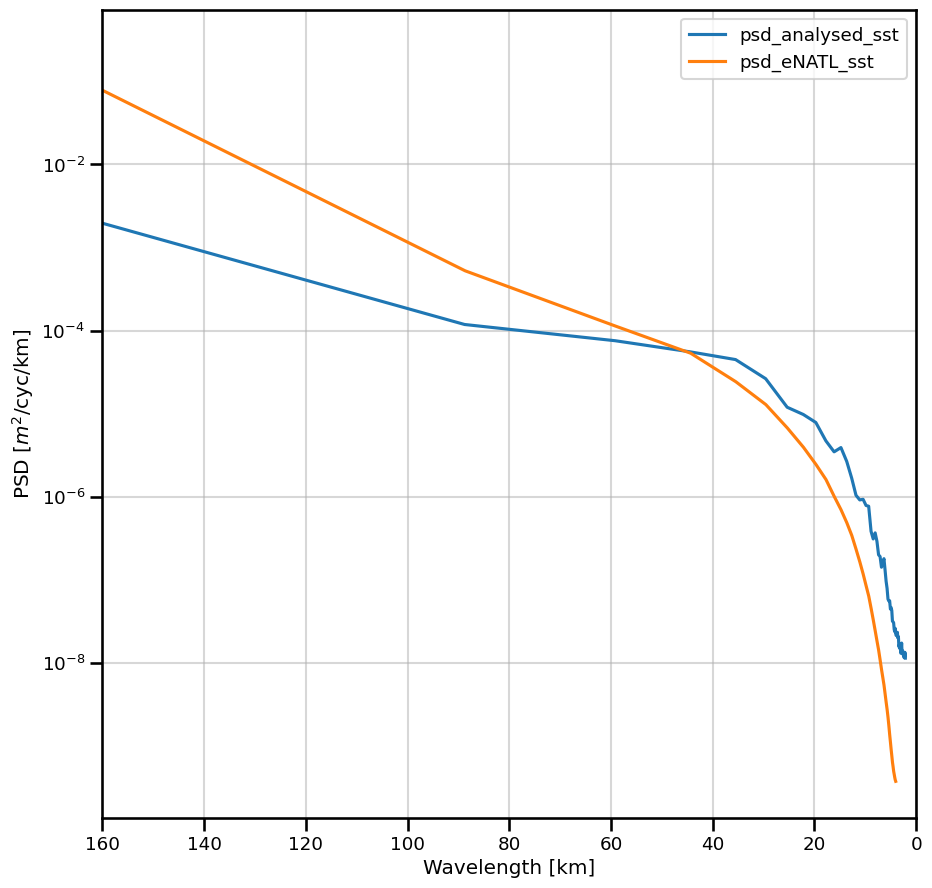

In [6]:
tocheck=['psd_analysed_sst']#, 'psd_analysis_error']


plt.rcParams["figure.figsize"] = [10.50, 10.50]


f, (ax1) = plt.subplots(1,1, sharey=True)

for i in tocheck:
    print(i)

    mini1=np.where(L4[i]==L4[i].values.min())[0][0]
    ax1.plot(1/L4[i]['freq_lon'+i[3:]][0:mini1]*111,L4[i][0:mini1], label=i)

i=0
tocheck=['psd_eNATL_sst']

for i in tocheck:
    print(i)

    mini1=np.where(model[i]==model[i].values.min())[0][0]
    ax1.plot(1/model[i]['freq_lon'+i[3:]][0:mini1]*111,model[i][0:mini1], label=i)

i=0



ax1.set_ylabel('PSD [$m^2$/cyc/km]')
ax1.set_xlabel('Wavelength [km]')
ax1.grid(which="both", alpha=0.5)  
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlim([0, 160])
ax1.invert_xaxis()
ymin, ymax = ax1.get_ylim()


plt.show()    


### Daily min/max PSD fom L4 and eNATL

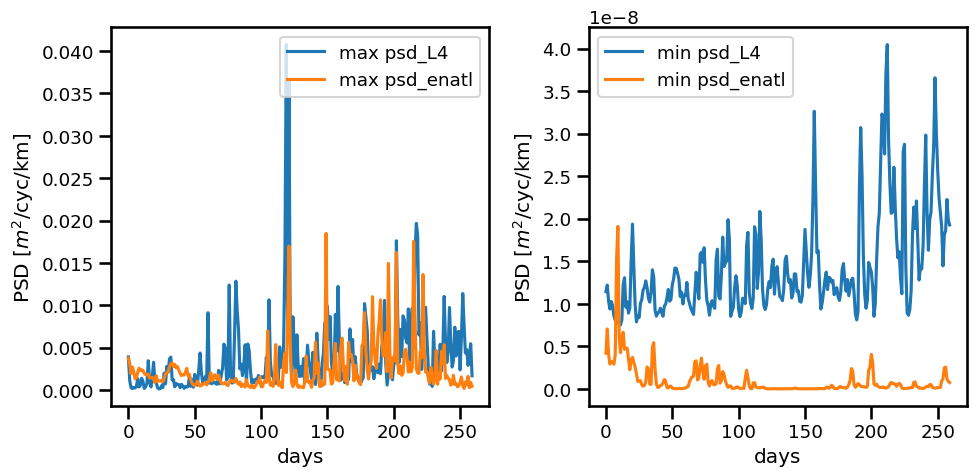

In [37]:
psd_L=np.load('psd_L.npy')
psd_M=np.load('psd_M.npy')


plt.rcParams["figure.figsize"] = [10, 5]


f, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(psd_L[1,0:260], label='max psd_L4')
ax1.plot(psd_M[1,0:260], label='max psd_enatl')
ax1.legend()
ax1.set_ylabel('PSD [$m^2$/cyc/km]')
ax1.set_xlabel('days')

ax2.plot(psd_L[0,0:260], label='min psd_L4')
ax2.plot(psd_M[0,0:260], label='min psd_enatl')
ax2.legend()
ax2.set_ylabel('PSD [$m^2$/cyc/km]')
ax2.set_xlabel('days')

plt.tight_layout()
plt.show()

In [7]:
from mpsd import *
from myfuncts2  import *

model = xr.open_mfdataset('data/daily/enatl_nn.nc')


sst="eNATL_sst"

plt.rcParams["figure.figsize"] = [5, 5]
f, ax = plt.subplots(1, 1, sharey=True)

i=73 #L4>>model
i=0 #L4<model 
i=10 #L4<<model
i=20 #L4>>>model
i=40 #L4< model large scale > smale scale
i=60 #L4>model
i=80 #same
i=100  #L4< model large scale > smale scale
i=120 # same highscale L4>,odel smal
i=150 #l4>>>>model
i=200 #same
i=230
i=0
#L4[sst]=L4[sst]#-273.15
#model = model.sel(time=slice(model['time'][i],model['time'][i+2]))
model[sst][0,:,:].plot(ax=ax,x='lon', y='lat')

#plt.show()
#model

In [8]:
from mpsd import *
from myfuncts2  import *

L4 = xr.open_mfdataset('data/daily/sst.nc')


sst="analysed_sst"
L4 = L4.sel(time=slice(L4['time'][0],L4['time'][273]))

#plt.rcParams["figure.figsize"] = [5, 5]
#f, ax = plt.subplots(1, 1, sharey=True)

#L4[sst][0,:,:].plot(ax=ax,x='lon', y='lat')

#plt.show()
#ncdata

In [9]:
#alldata=['sst', 'sst_gcm_5', 'sst_gcm_10', 'sst_gcm_15', 'sst_gcm_20', 'sst_gcm_25', 'sst_gcm_30', 'sst_gcm_40', 'sst_gcm_45', 'sst_gcm_50']
alldata=sorted(list(L4.keys()))
for i in alldata:
    #i='eNATL_'+i
    print(i)
    signal= L4[i].chunk({"lat":1, 'time': L4['time'].size, 'lon': L4['lon'].size})
    signal['time'] = (signal.time - signal.time[0]) / numpy.timedelta64(1, 'D')
    psd_signal = xrft.power_spectrum(signal, dim=['time','lon'], detrend='constant', window=True).compute()
    mean_psd_signal = psd_signal.mean(dim=['lat']).where( (psd_signal.freq_time > 0) &(psd_signal.freq_lon > 0), drop=True)

    mean_psd_signal_lon = mean_psd_signal.mean("freq_time")
    mean_psd_signal_lon=mean_psd_signal_lon.rename({'freq_lon': 'freq_lon_'+i})
    L4=L4.assign(psd=mean_psd_signal_lon)
    L4=L4.rename({'psd': 'psd_'+i})

#mean_psd_signal_time = mean_psd_signal.mean("freq_lon")


analysed_sst
analysis_error


# PSD over 2010, different degrees of noise/smoothing  

psd_analysed_sst
psd_eNATL_sst
psd_eNATL_sst_n7_gcm_10
psd_eNATL_sst_n3_gcm_07
psd_eNATL_sst_n5_gcm_08


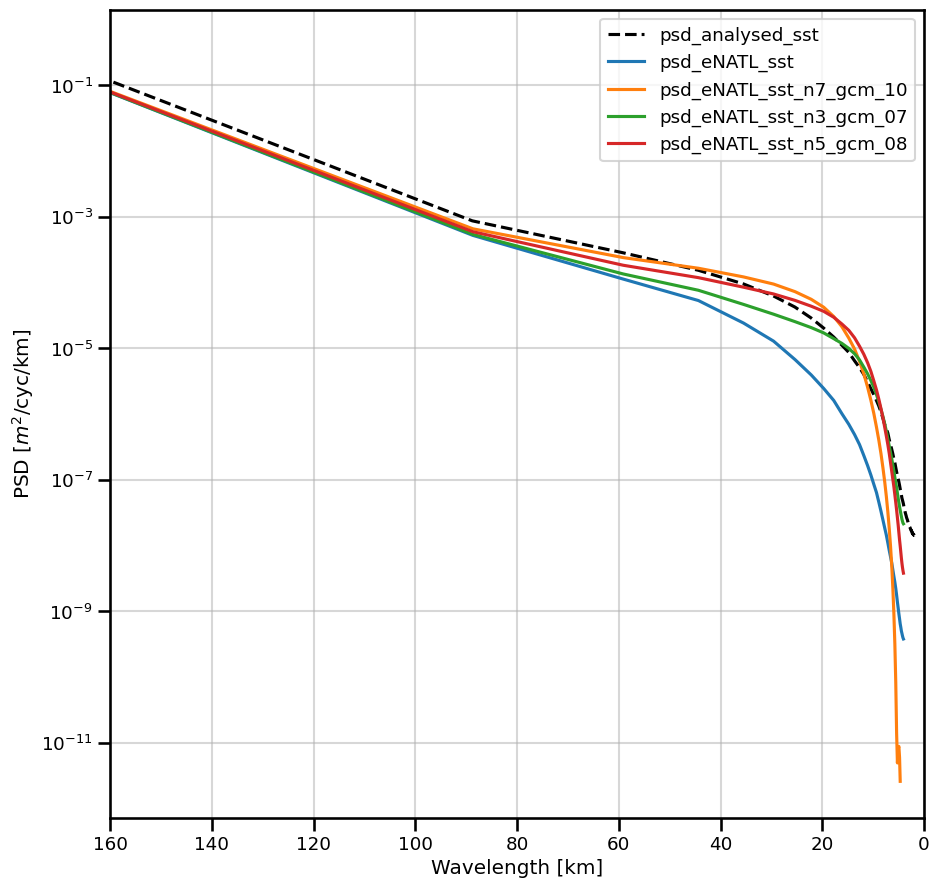

In [11]:
tocheck=['psd_analysed_sst']#, 'psd_analysis_error']


plt.rcParams["figure.figsize"] = [10.50, 10.50]


f, (ax1) = plt.subplots(1,1, sharey=True)

for i in tocheck:
    print(i)

    mini1=np.where(L4[i]==L4[i].values.min())[0][0]
    ax1.plot(1/L4[i]['freq_lon'+i[3:]][0:mini1]*111,L4[i][0:mini1], 'k--',label=i)

i=0
tocheck=['psd_eNATL_sst',   'psd_eNATL_sst_n7_gcm_10',   'psd_eNATL_sst_n3_gcm_07',   'psd_eNATL_sst_n5_gcm_08'
        
        ]

for i in tocheck:
    print(i)

    mini1=np.where(model[i]==model[i].values.min())[0][0]
    ax1.plot(1/model[i]['freq_lon'+i[3:]][0:mini1]*111,model[i][0:mini1], label=i)

i=0



ax1.set_ylabel('PSD [$m^2$/cyc/km]')
ax1.set_xlabel('Wavelength [km]')
ax1.grid(which="both", alpha=0.5)  
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlim([0, 160])
ax1.invert_xaxis()
ymin, ymax = ax1.get_ylim()


plt.show()    


# Check if we are learning Gyclogeostrophic correction..


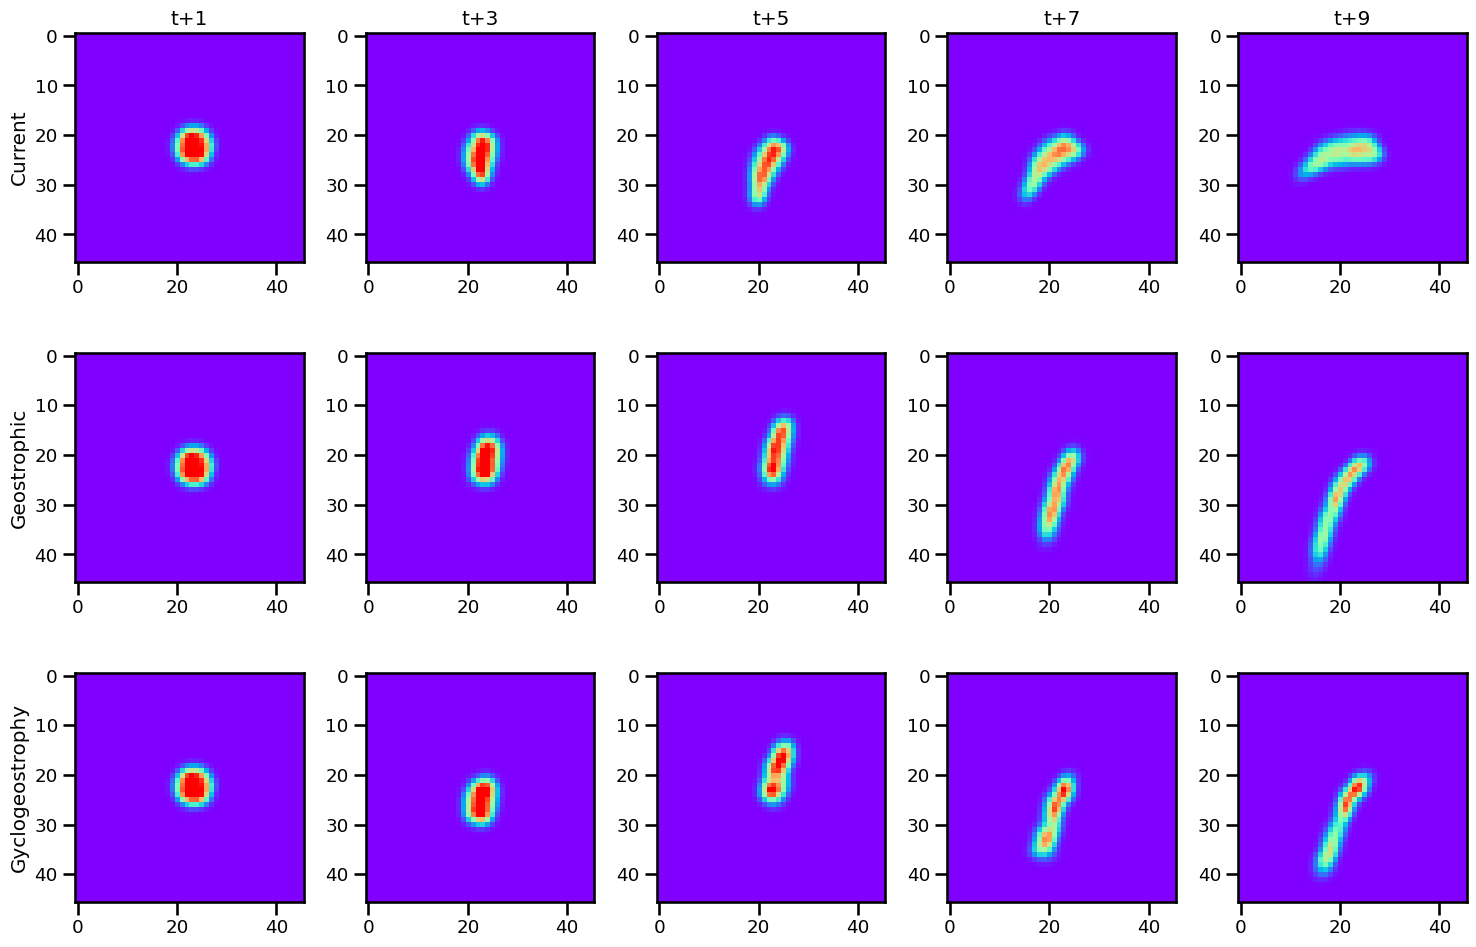

In [42]:


gt, geo, cyc =myfuncts.load_geo_cyc(9)

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(geo[i], axis=None), geo[i].shape)
    ind3 = np.unravel_index(np.argmax(cyc[i], axis=None), cyc[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(geo[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(cyc[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Current')
axs[1,0].set_ylabel('Geostrophic')
axs[2,0].set_ylabel('Gyclogeostrophy')
plt.tight_layout()
plt.show()

### Test ML om ~~2011~~ early 2009

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(5,10))

gt, ssh_8c, ssh, ssh_8c2, sstssh  =myfuncts.load_tst8b()

def get_diff (gt, ml, pr):
    
    gt[gt==0]=np.nan
    ml[ml==0]=np.nan
    mm=np.zeros(120)
    i=0
    for i in range(120):
        tr1=np.nanquantile(gt[i], pr, axis=None)
        tr2=np.nanquantile(ml[i], pr, axis=None)
        gt[i][np.isnan(gt[i])]=0
        gt[i][np.where(gt[i]>=tr2)]=1
        gt[i][np.where(gt[i]<tr2)]=0
        ml[i][np.isnan(ml[i])]=0
        ml[i][np.where(ml[i]>=tr2)]=1
        ml[i][np.where(ml[i]<tr2)]=0
        #print(tr1,tr2)
    for i in range(1,10):
        mm[i]=2*(ml[i]*gt[i-1]).sum()/(ml[i].sum()+gt[i-1].sum())
    
    
    print('intersection ([%] quantile 90th): ',mm.mean())
    j=3
    return ml[j], gt[j-1]
    

aa, bb=get_diff(gt,ssh_8c,0.9)



intersection ([%] quantile 90th):  0.7715772785536609


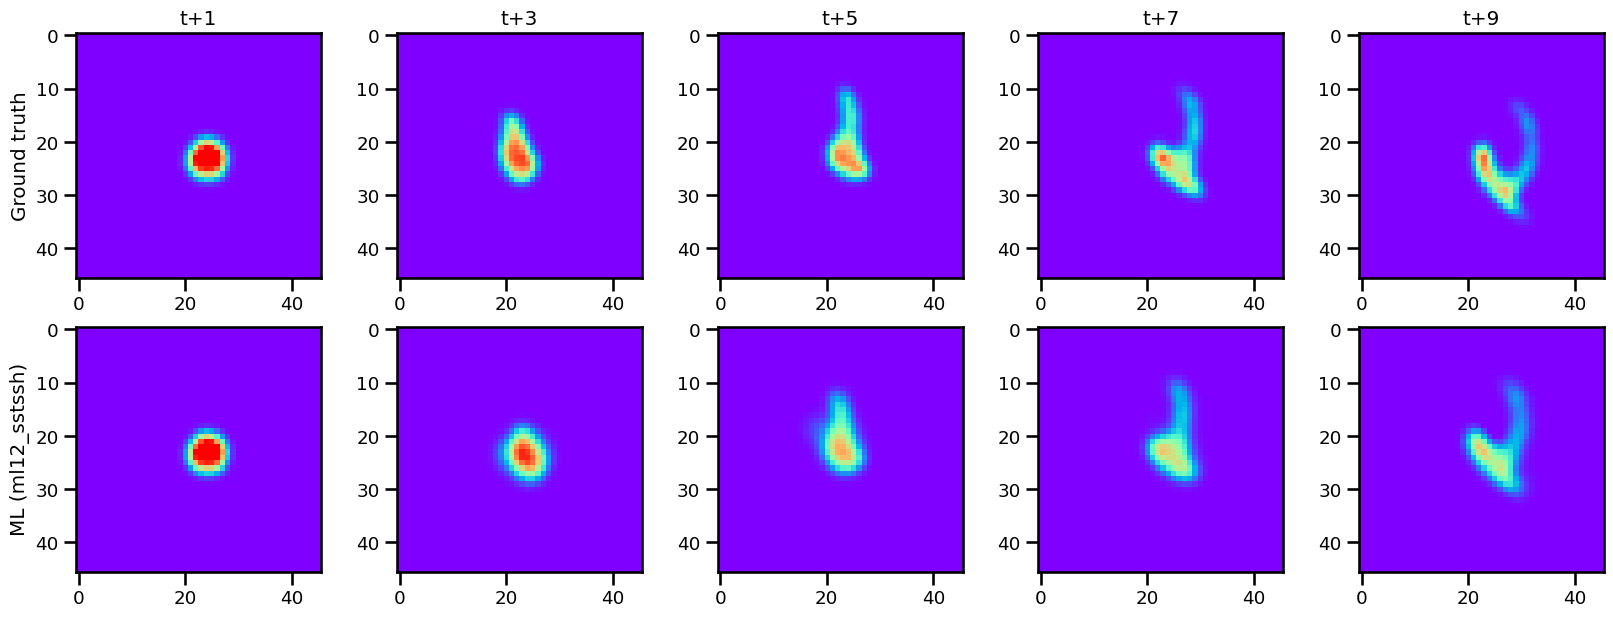

In [46]:


gt, ssh_8c, ssh, ssh_8c2, sstssh  =myfuncts.load_tst8b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,7))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    ind3 = np.unravel_index(np.argmax(ssh_8c[i], axis=None), ssh[i].shape)
    ind4 = np.unravel_index(np.argmax(sstssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(sstssh[i,ind4[0]-k:ind4[0]+k,ind4[1]-k:ind4[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_sstssh)')
plt.show()